# Redes Neurais Artificiais: Projeto Prático 2
Aprendizado Supervisionado com Neurônio Perceptron


**Integrantes:**

- **[Leonardo Monteiro Neres de Lima](https://github.com/MichPaz)** - 1615080320
- **[Thatielen Oliveira Pereira](https://github.com/thatielenoliveira)** - 1515080618
- **[Vyctor Lima Negreiros](https://github.com/VycLN)** - 1615080372

## Preparação Inicial

### Bibiotecas Utilizadas

In [1]:
import math, matplotlib.pyplot as plt, numpy as np, os, pandas as pd, random

### Definindo Precisão de Quatro Casas Decimais

In [2]:
np.set_printoptions(precision=4)
pd.set_option('display.precision', 4)

### Funções Auxiliares

In [3]:
# Preparação dos arrays de entradas
def separar_entradas(registros):
    entrada = []
    
    for registro in registros:
        entrada.append([])
        entrada[-1].append(-1)
        entrada[-1].append(registro[0])
        entrada[-1].append(registro[1])
    
    return np.array(entrada, dtype=float)

# Preparação dos arrays de saídas
def separar_saidas(registros):
    saida = []
    
    for registro in registros:
        saida.append(registro[2])
    
    return np.array(saida, dtype=int)

# Mapear labels para cores
def criar_cores(saidas):
    cores, mapa_cores = [], {0: 'red', 1: 'blue'}
    
    for saida in saidas:
        cores.append(mapa_cores[saida])

    return cores

# Função para aleatorização dos arrays de entradas e saídas
def aleatoriza(entradas, saidas):
    entrada_aleatoria, saida_aleatoria, tam = np.array([]), np.array([]), len(entradas)
    
    for i in range(tam): 
        index = random.randint(0, len(entradas) - 1)

        entrada_aleatoria = np.append(entrada_aleatoria, entradas[index])
        saida_aleatoria = np.append(saida_aleatoria, saidas[index])

        entradas = np.delete(entradas, index, 0)
        saidas = np.delete(saidas, index, 0)

    entrada_aleatoria = entrada_aleatoria.reshape(entrada_aleatoria.size // 3, 3)
    
    return (entrada_aleatoria, saida_aleatoria)

# Implementação do cálculo da acurácia
def acuracia(vp, vn, fp, fn):
    return (vp + vn) / (vp + vn + fp + fn)

# Implementação do cálculo da precisão
def precisao(vp, vn, fp, fn):
    return vp / (vp + fp)

# Implementação do cálculo da revocação
def revocacao(vp, vn, fp, fn):
    return vp / (vp + fn)

# Implementação do cálculo do f1 score
def f1(vp, vn, fp, fn):
    r = revocacao(vp, vn, fp, fn)
    p = precisao(vp, vn, fp, fn)
    
    return 2 * (r * p) / (r + p) 

### Implementação do Perceptron

In [4]:
class Perceptron:
    # Instanciação do objeto Perceptron de acordo com parâmetros
    def __init__(self, teta, taxa_aprendizagem, pesos):
        self.teta = teta
        self.taxa_aprendizagem = taxa_aprendizagem
        self.pesos = pesos
        
    # Função de ativação degrau
    def funcao_ativacao(self, soma):
        if (soma >= self.teta):
            return 1
        return 0

    # Função que realiza o produto escalar de um regitro com os pesos
    def calculo_saida(self, registro):
        soma = registro.dot(self.pesos)
        return self.funcao_ativacao(soma)

    # Função de treinamento que é executada até que não haja erro ou limite de iterações caso fornecido
    def treinamento(self, entradas, saidas, max_epocas=0, aleatorio=False, debug=True):
        # Aleatorização das entradas
        if aleatorio:
            entradas, saidas = aleatoriza(entradas, saidas)
        
        # Inicialização de variáveis
        epocas, ajustes_por_epoca, saidas_treinamento = 1, [], np.array([], dtype=int)
        
        # Exibição inicial dos pesos
        if debug:
            print('Pesos Iniciais:', self.pesos)
            print()

        # Loop que garante a execução até que não haja erro
        while (np.array_equal(saidas, saidas_treinamento) == False and (epocas < max_epocas or max_epocas == 0)):
            ajustes_pesos, saidas_treinamento = 0, np.array([], dtype=int)
            
            # Loop para percorrer todas as entradas/saídas
            for i in range(0, len(entradas), 1):
                alterou_pesos = False
                
                # Cálculo da saída para a entrada atual aplicando-se os pesos
                saida_calculada = self.calculo_saida(np.asarray(entradas[i]))
                
                # Cálculo do erro da saída
                erro = saidas[i] - saida_calculada
                # Salvamento da saída
                
                saidas_treinamento = np.append(saidas_treinamento, saida_calculada)
                # Loop para atualização do vetor de pesos
                
                for j in range(0, len(self.pesos)):
                    # Cálculo do novo peso
                    aux = self.pesos[j] + (self.taxa_aprendizagem * entradas[i][j] * erro)
                    
                    # Contagem de ajustes dos pesos da época caso haja mudança de valor
                    if(aux != self.pesos[j]):
                        ajustes_pesos += 1
                        alterou_pesos = True
                    
                    self.pesos[j] = aux
                
                # Exibe os pesos casa haja alteração
                if(alterou_pesos == True and debug):
                    print('Novos Pesos:', self.pesos)
            
            # Exibe o número de ajustes de pesos da época
            if debug:    
                print()
                print('%d ajustes no vetor de pesos na época %d' % (ajustes_pesos, epocas))
                print()
            
            # Guarda o total de ajustes por época
            ajustes_por_epoca.append(ajustes_pesos)
            epocas += 1

        return epocas, ajustes_por_epoca
    
    # Função para predição de valores
    def predicao(self, registros):
        y_previsto = []
        
        for i in range(len(registros)):
            y_previsto.append(self.calculo_saida(np.asarray(registros[i])))
        
        return y_previsto
    
    # Função para retorno da matriz de confusão
    def matriz_confusao(self, previsto, real):
        vp, vn, fp, fn = 0, 0, 0, 0
        
        for i in range(len(real)):
            if (real[i] == 0):
                if (previsto[i] == 0):
                    vn += 1
                else:
                    fn += 1
            else:
                if (previsto[i] == 1):
                    vp += 1
                else:
                    fp += 1
                    
        return [[vp, fp], [fn, vn]], (vp, vn, fp, fn)

## Parte I – Resolvendo um Problema Linearmente Separável

### Leitura do arquivo `dataAll.txt`

In [5]:
data = np.fromfile(os.path.join('datasets', 'dataAll.txt'), dtype=float)
print(data.shape)

(3000,)


### Redimensionamento do Array

In [6]:
registros = data.reshape(data.size // 3, 3)
print(registros.shape)

(1000, 3)


### Preparação dos Arrays de Entradas e Saídas

In [7]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(1000, 3)
(1000,)


## 1. As equipes devem utilizar a função de ativação degrau com θ = 0;

In [8]:
teta = 0

## 2. O valor da taxa de aprendizado deve ser igual a η = 0,1;

In [9]:
taxa_aprendizagem = 0.1

## 3. O vetor inicial de pesos deve ter seus valores inicializados conforme uma variável aleatória de distribuição uniforme no intervalo, isto é, wi ∼ U(−0,5, + 0,5). O vetor inicial de pesos deve ser impresso no início da execução do algoritmo;

In [10]:
pesos_iniciais = np.random.uniform(-0.5, 0.5, X.shape[1])

### Instanciação do Perceptron

In [11]:
perceptron1 = Perceptron(teta=teta, taxa_aprendizagem=taxa_aprendizagem, pesos=pesos_iniciais)
print(perceptron1.pesos)

[ 0.1325  0.1019 -0.355 ]


## 4. A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
## 5. Sempre que o vetor de pesos for ajustado, este deve ser impresso;
## 6. O algoritmo deve executar até a convergência, isto é, até que não haja erros para todos os exemplos presentes no conjunto de treinamento;

**Os items 4, 5 e 6 são respondidos nas células seguir:**

### Treinamento do Neurônio

In [12]:
epocas, ajustes_por_epoca = perceptron1.treinamento(X, Y)

Pesos Iniciais: [ 0.1325  0.1019 -0.355 ]

Novos Pesos: [3.2467e-02 7.2898e+01 3.5475e+01]
Novos Pesos: [-6.7533e-02  7.4051e+01 -2.3373e+01]
Novos Pesos: [ 3.2467e-02 -9.4784e+00 -1.2250e+02]
Novos Pesos: [   0.1325   39.7084 -105.8706]
Novos Pesos: [ 3.2467e-02  1.2231e+02 -2.6015e+01]
Novos Pesos: [   0.1325   82.2982 -103.9074]
Novos Pesos: [  0.2325 135.968  -54.8152]
Novos Pesos: [   0.1325   83.008  -111.6846]
Novos Pesos: [  0.2325 142.5675 -61.5623]
Novos Pesos: [ 1.3247e-01  1.1009e+02 -1.3502e+02]
Novos Pesos: [ 3.2467e-02  1.8146e+02 -7.0476e+01]
Novos Pesos: [-6.7533e-02  1.3594e+02 -1.3611e+02]

36 ajustes no vetor de pesos na época 1


0 ajustes no vetor de pesos na época 2



## 7. Ao final, deve-se imprimir:

## a) O número total de ajustes no vetor de pesos;

In [13]:
print('Total de ajustes de pesos:', sum(ajustes_por_epoca))

Total de ajustes de pesos: 36


## b) O número de épocas até a convergência;

In [14]:
print('Total de Épocas:', epocas)

Total de Épocas: 3


## c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

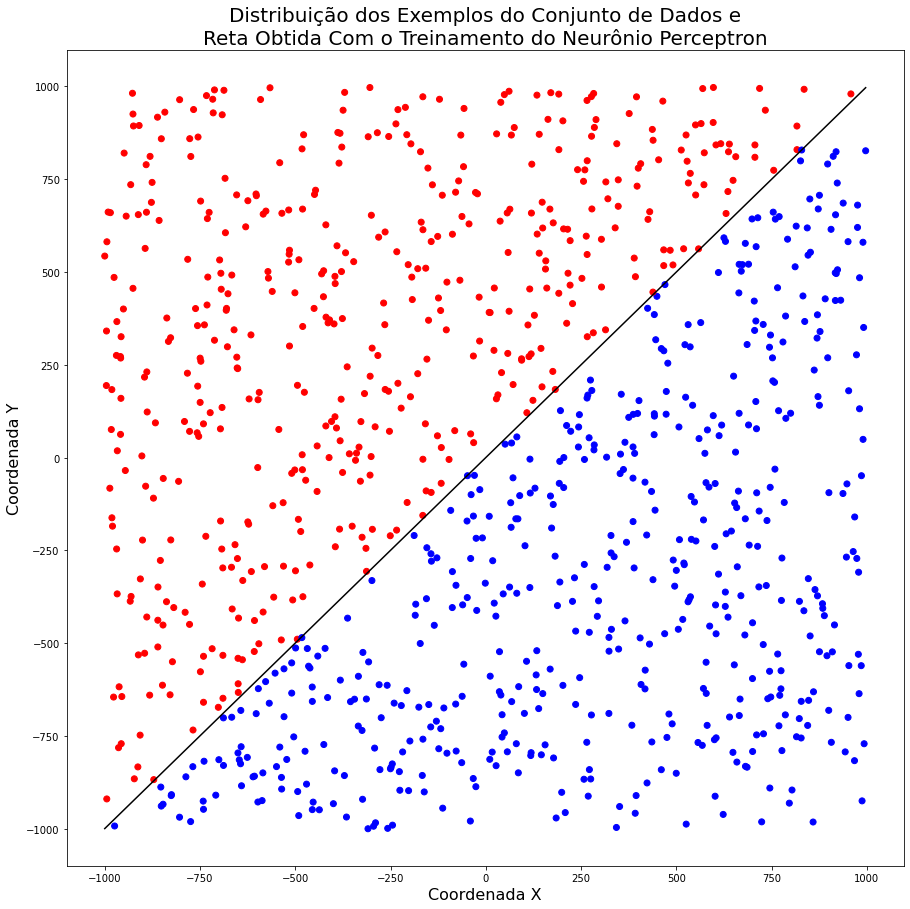

In [15]:
plt.rcParams['figure.figsize'] = (15, 15)

# Cálculo dos coeficientes da linha de decisão
a, b = perceptron1.pesos[0] / perceptron1.pesos[2], (-1) * (perceptron1.pesos[1] / perceptron1.pesos[2])
menor, maior = min(X[:,1]), max(X[:,1])

# Criando os pontos da linha de decisão para treino
x = np.arange(menor, maior, 0.1)
y = a + b * x

# Criação de cores de acordo com a saída
cores = criar_cores(Y)

# Criação do gráfico para treino    
plt.plot(x, y, color='black', markersize=100)
plt.title('Distribuição dos Exemplos do Conjunto de Dados e\n' \
          'Reta Obtida Com o Treinamento do Neurônio Perceptron', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
plt.show()

## Parte II – Experimentação

### Parâmetros Necessários

In [16]:
# Teta e intervalos para distribuição de pesos respectivamente
teta, intervalos = 0, [(-100, 100), (-1, 1), (-0.5, 0.5)]

# Taxas de aprendizagem
n = [0.4, 0.1, 0.01]

### Produto Cartesiano para Gerar uma Lista de Configurações

In [17]:
index = pd.MultiIndex.from_product([n, intervalos], names=['n', 'intervalo'])
configuracoes = pd.DataFrame(index=index).reset_index()

### Leitura do Arquivo `data2.txt`

In [18]:
data = np.fromfile(os.path.join('datasets', 'data2.txt'), dtype=float)
print(data.shape)

(1800,)


### Redimensionamento do Array

In [19]:
registros = data.reshape(data.size // 3, 3)
print(registros.shape)

(600, 3)


### Preparação dos Arrays de Entradas e Saídas

In [20]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(600, 3)
(600,)


### Iteração pela Lista de Configurações e Evidências da Convergência para Cada Configuração

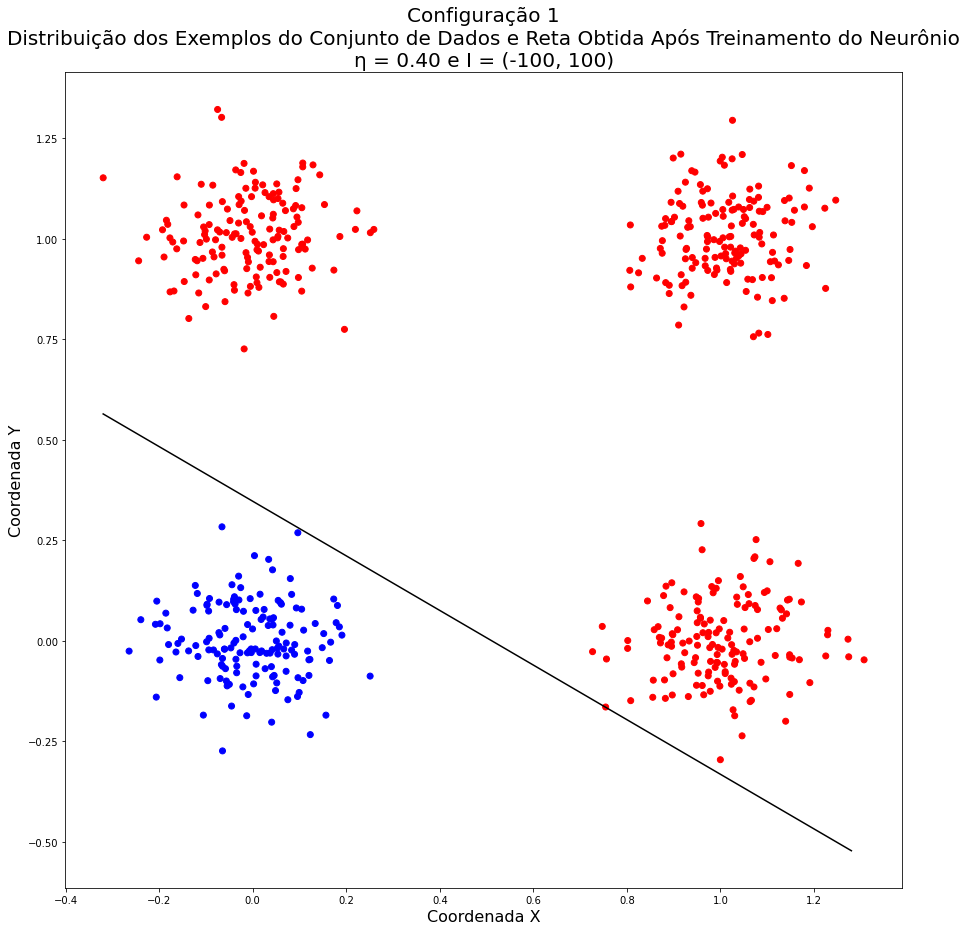

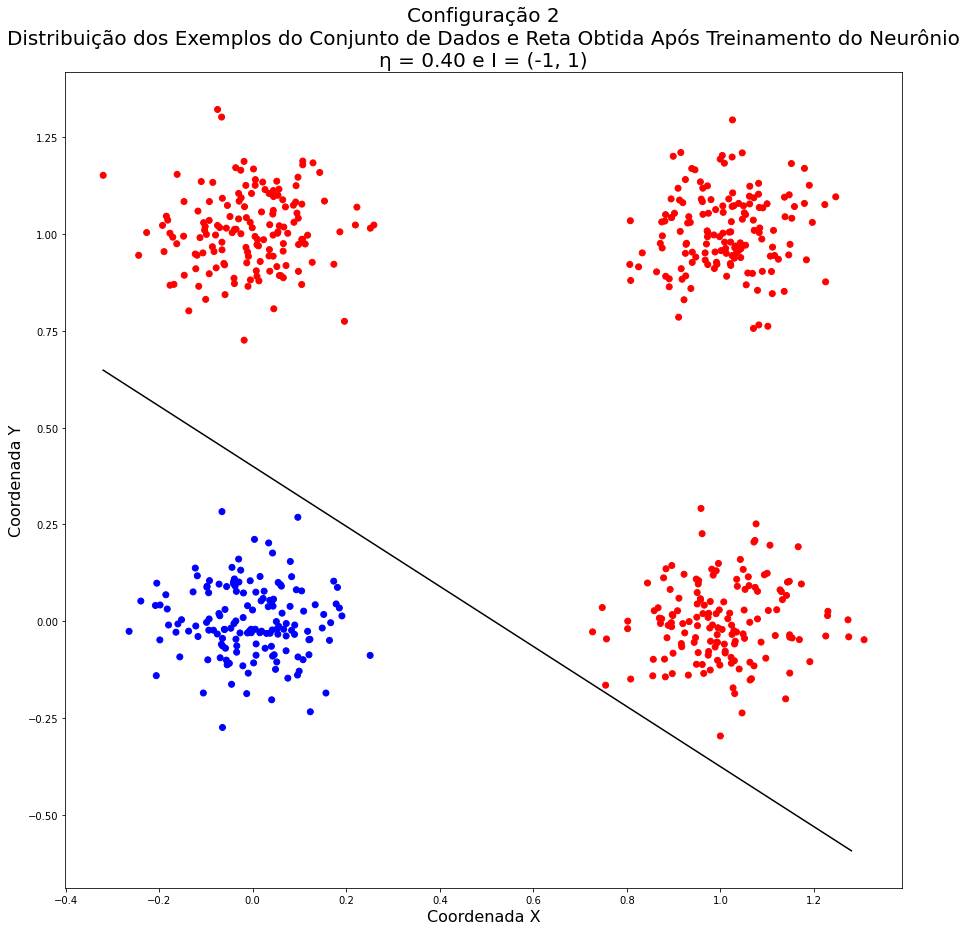

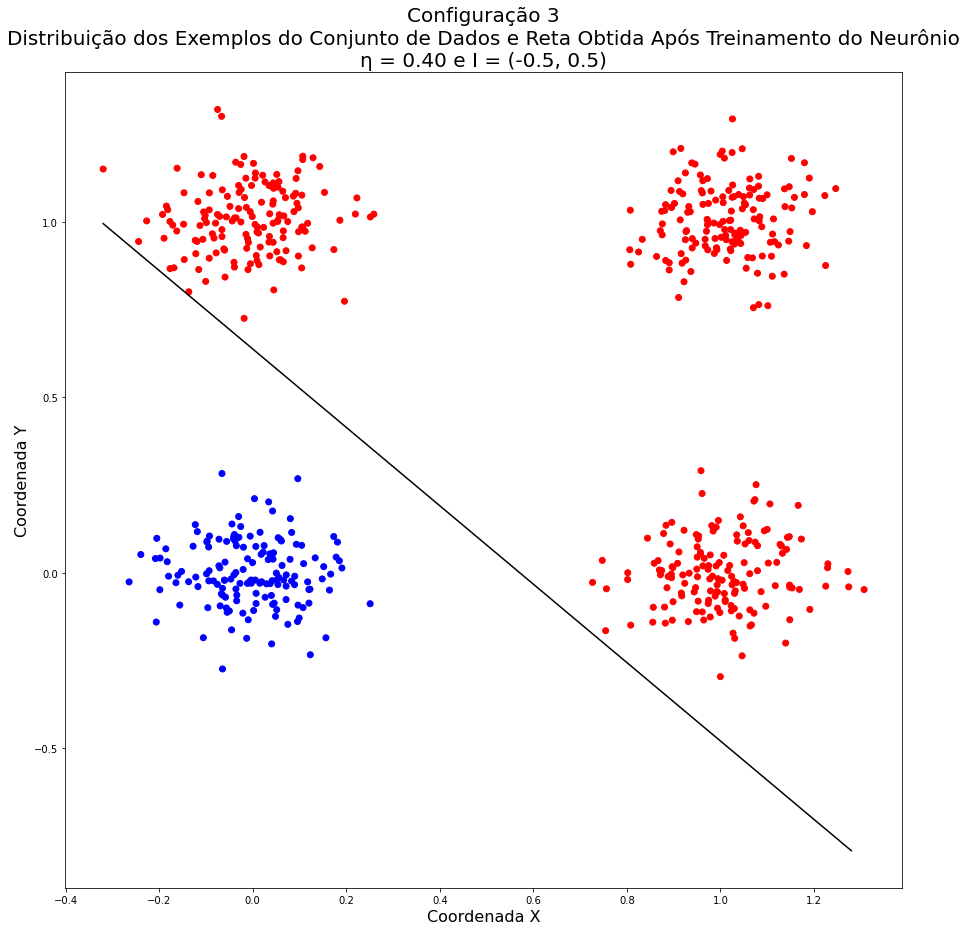

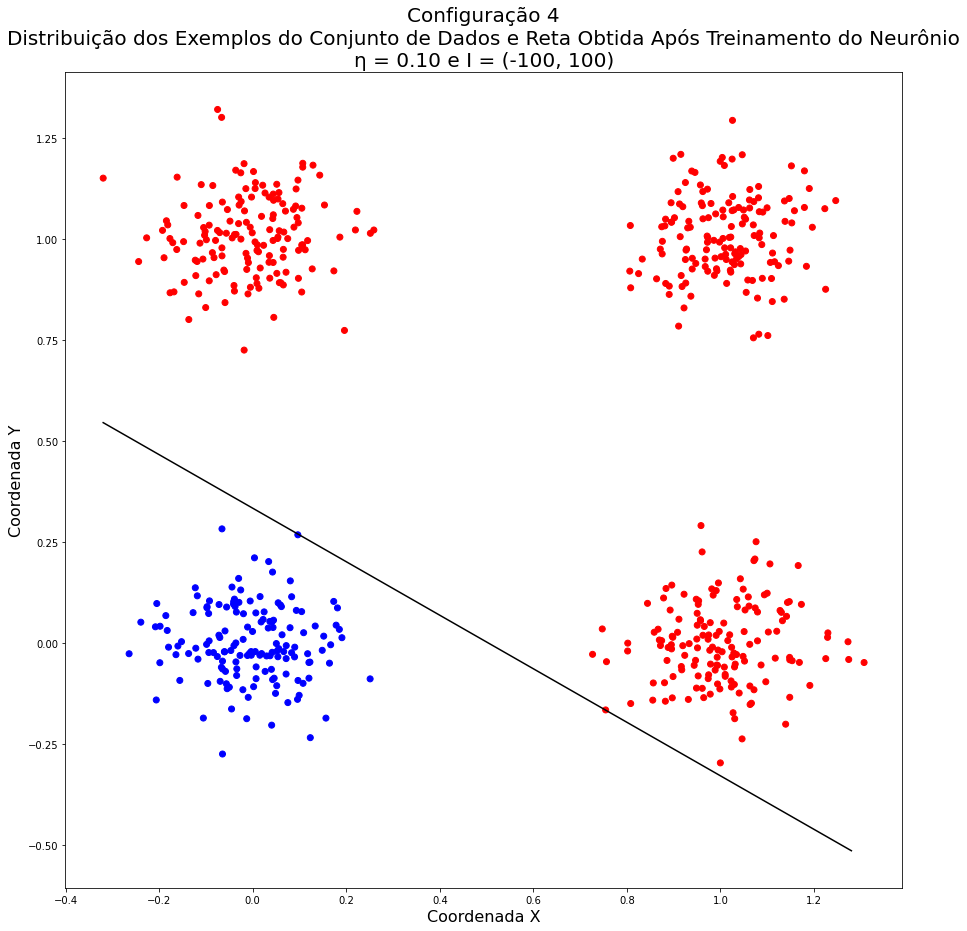

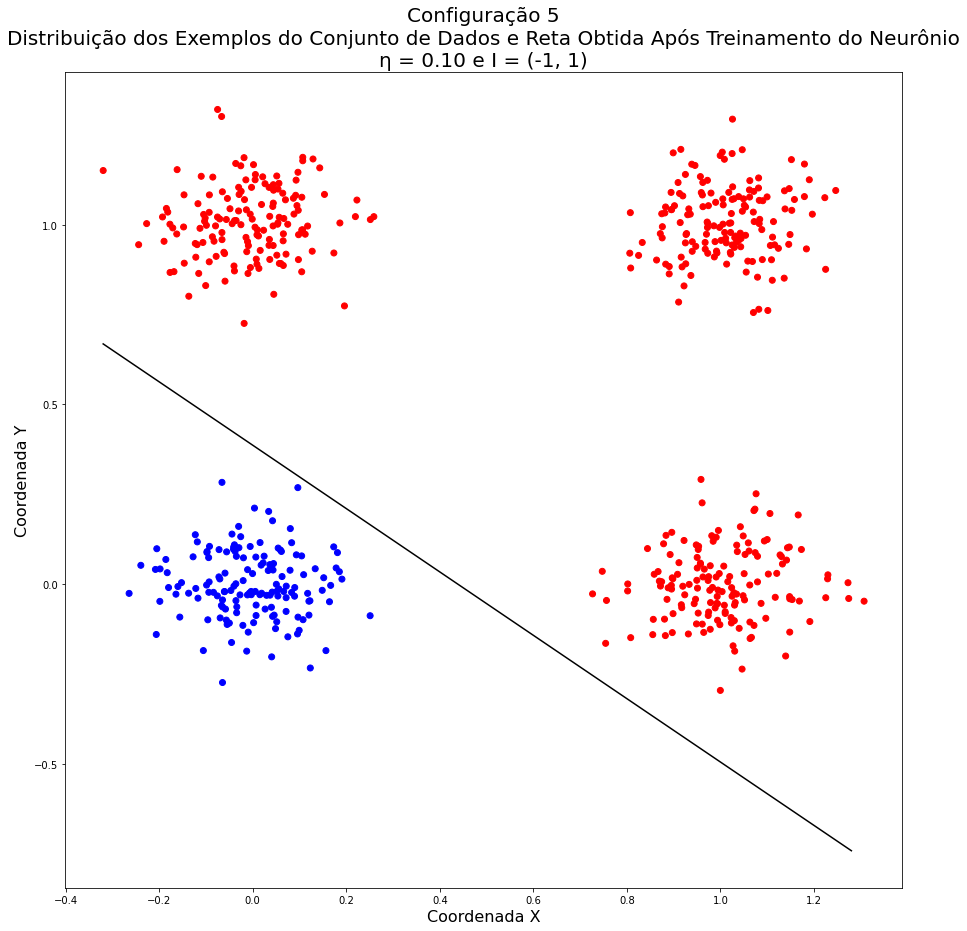

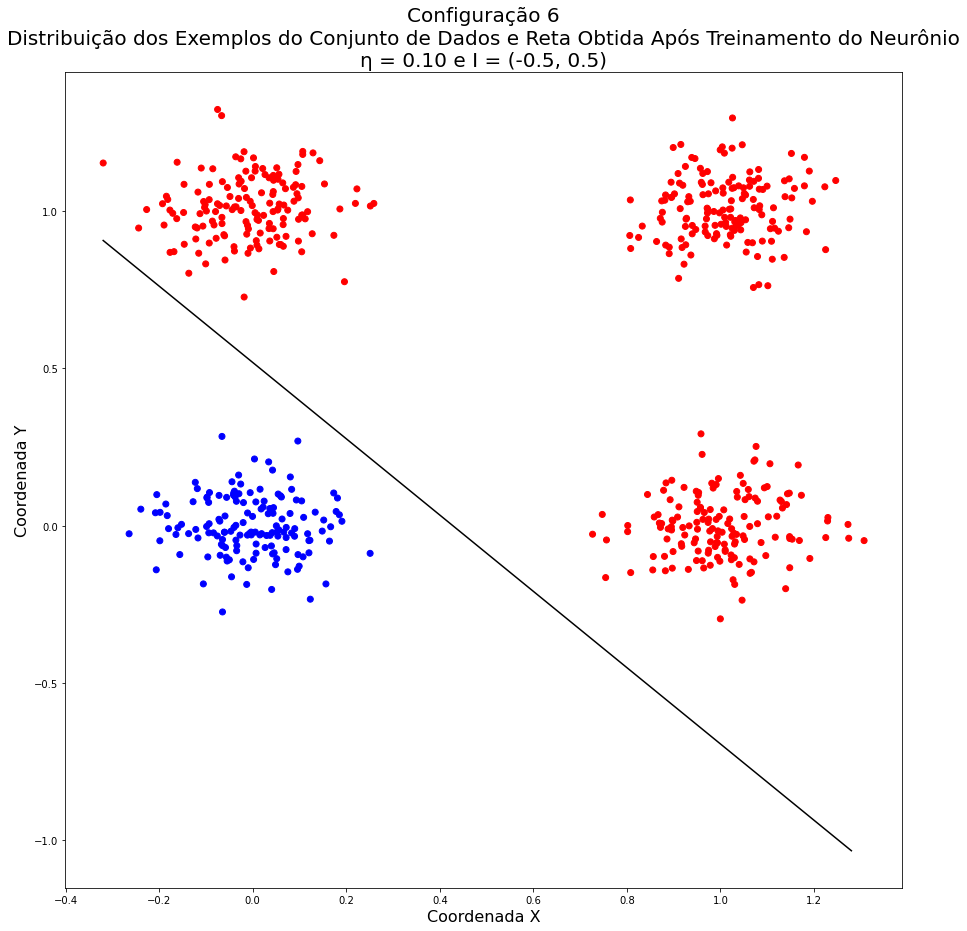

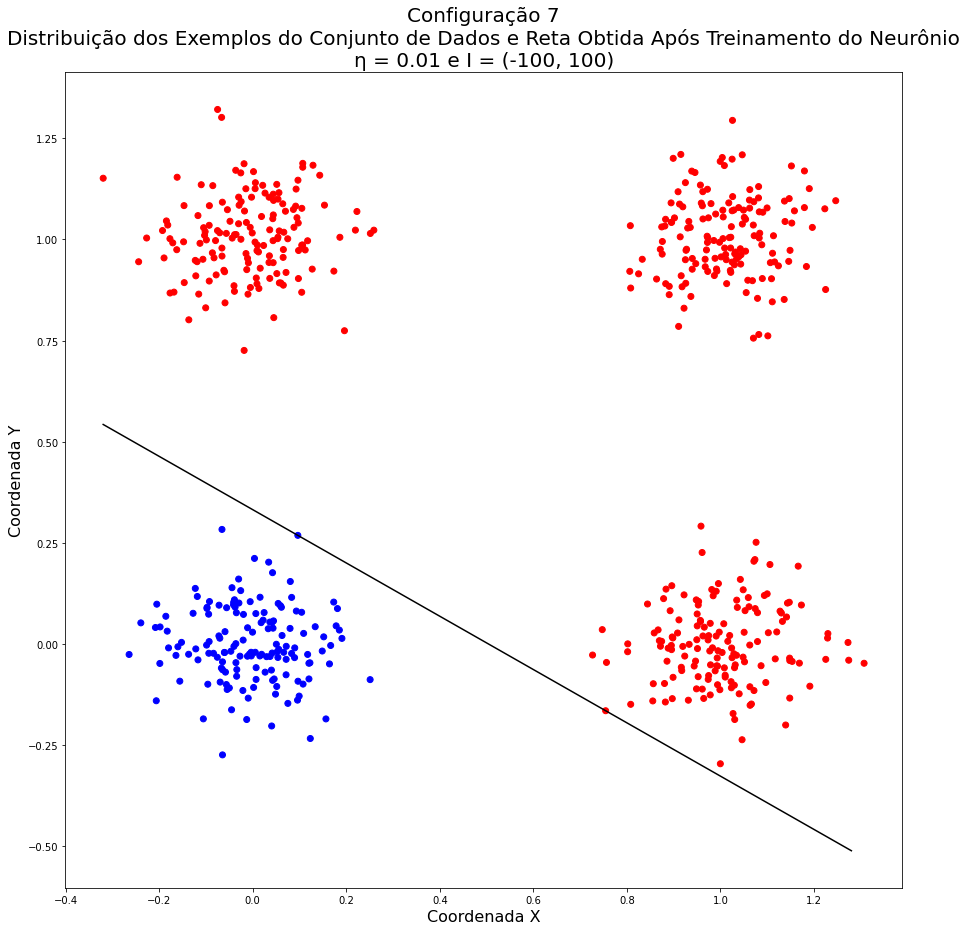

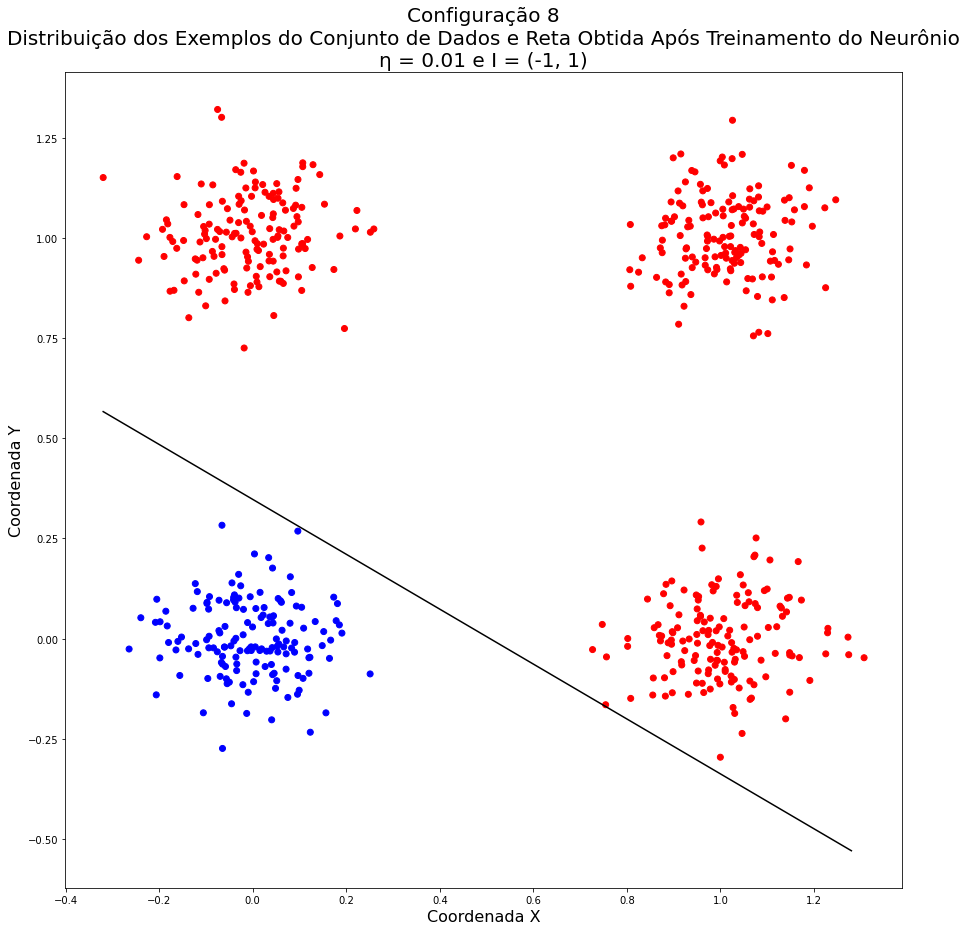

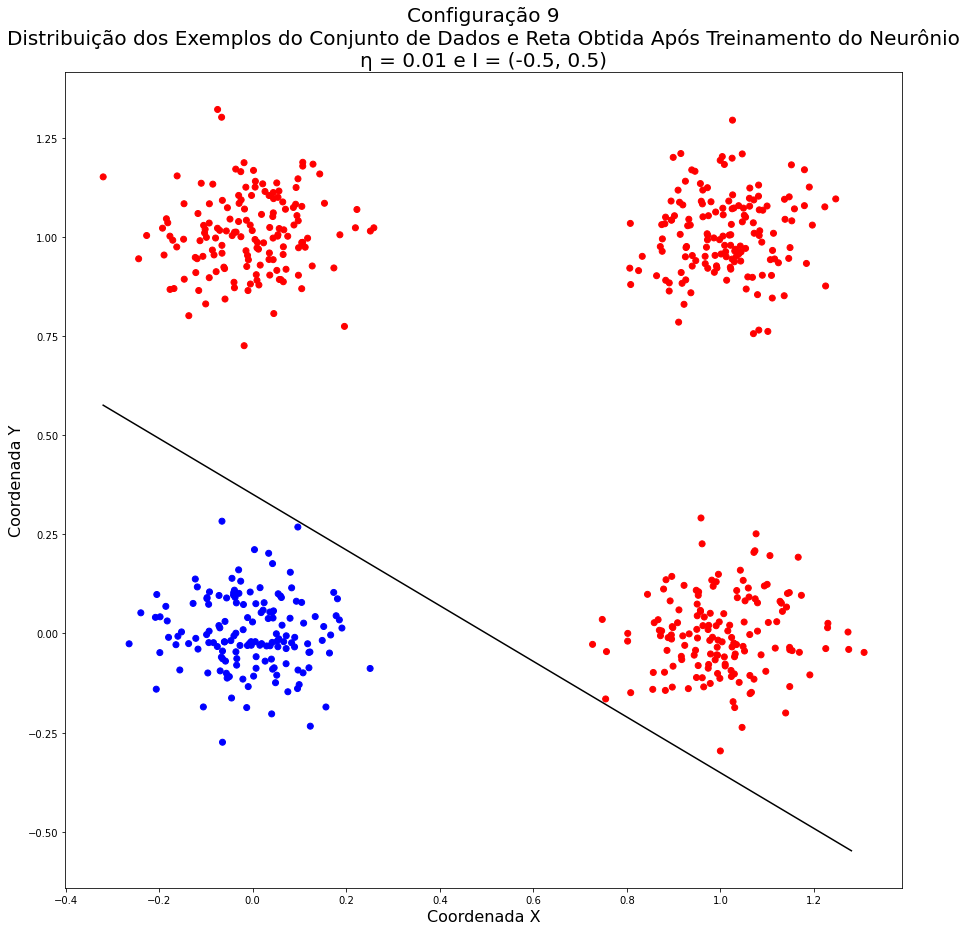

In [21]:
for i in range(configuracoes.shape[0]):
    n, intervalo = configuracoes['n'][i], configuracoes['intervalo'][i]
    
    pesos_iniciais = np.random.uniform(intervalo[0], intervalo[1], X.shape[1])
    perceptron2 = Perceptron(teta=teta, taxa_aprendizagem=n, pesos=pesos_iniciais)
    
    epocas, ajustes_por_epoca = perceptron2.treinamento(X, Y, debug=False)
    
    # Cálculo dos coeficientes da linha de decisão
    a, b = perceptron2.pesos[0] / perceptron2.pesos[2], (-1) * (perceptron2.pesos[1] / perceptron2.pesos[2])
    menor, maior = min(X[:,1]), max(X[:,1])
    
    # Criando os pontos da linha de decisão para treino
    x = np.arange(menor, maior, 0.1)
    y = a + b * x
    
    # Criação de cores de acordo com a saída
    cores = criar_cores(Y)
    
    # Criação do gráfico    
    plt.plot(x, y, color='black', markersize=100)
    
    plt.title('Configuração %d\n' \
              'Distribuição dos Exemplos do Conjunto de Dados e ' \
              'Reta Obtida Após Treinamento do Neurônio\n' \
              'η = %.2f e I = %s' % (i + 1, n, intervalo), size=20)
    
    plt.xlabel('Coordenada X', size=16)
    plt.ylabel('Coordenada Y', size=16)
    
    plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
    plt.show()

### Reexecução do Treinamento por 100 Iterações

In [22]:
res_configuracoes = []

for i in range(configuracoes.shape[0]):
    n, intervalo = configuracoes['n'][i], configuracoes['intervalo'][i]
    execucoes, ajustes = [], []
    
    for j in range(100):        
        pesos_iniciais = np.random.uniform(intervalo[0], intervalo[1], X.shape[1])
        perceptron2 = Perceptron(teta=teta, taxa_aprendizagem=n, pesos=pesos_iniciais)

        epocas, ajustes_por_epoca = perceptron2.treinamento(X, Y, debug=False)    
        
        execucoes.append(epocas)
        ajustes.append(sum(ajustes_por_epoca))
    
    res_configuracoes.append([intervalo[0], intervalo[1], n, sum(execucoes), sum(ajustes)])
    
    print('\n' + '_' * 38 + '100 execuções para a configuração ' + str(i + 1) + '_' * 38 + '\n')
    
    df = {'Quantidade de Ajustes de Pesos:': sum(ajustes),
          'Média de Ajustes de Pesos:': np.average(ajustes),
          'Desvio Padrão dos Ajustes de Pesos:': np.std(ajustes),
          'Quantidade de Épocas:': sum(execucoes),
          'Media de Épocas:': np.average(execucoes),
          'Desvio Padrão de Épocas:': np.std(execucoes)}
    
    print(pd.DataFrame.from_dict(df, orient='index', columns=['Valor']))


______________________________________100 execuções para a configuração 1______________________________________

                                           Valor
Quantidade de Ajustes de Pesos:      113790.0000
Média de Ajustes de Pesos:             1137.9000
Desvio Padrão dos Ajustes de Pesos:     613.5373
Quantidade de Épocas:                  1976.0000
Media de Épocas:                         19.7600
Desvio Padrão de Épocas:                 12.0914

______________________________________100 execuções para a configuração 2______________________________________

                                         Valor
Quantidade de Ajustes de Pesos:      3648.0000
Média de Ajustes de Pesos:             36.4800
Desvio Padrão dos Ajustes de Pesos:    17.4554
Quantidade de Épocas:                 721.0000
Media de Épocas:                        7.2100
Desvio Padrão de Épocas:                2.2508

______________________________________100 execuções para a configuração 3__________________________

## Análise das Configurações  

**Para a experimentação é importante analizar os parâmetros resultantes do treinamento baseando-se na quantidade de execuções em função dos parâmetros das configurações adotadas.**

In [23]:
# Conversão do array
res_configuracoes = np.array(res_configuracoes)

# Função para configurar o gráfico de acordo com a configuração e o resultado do treinamento
def grafico_configuracao(y, x, eixo_x, eixo_y, titulo):
    valores_x = np.unique(res_configuracoes[:, y])
    valores_y = np.full((1, len(valores_x)), 0)[0]
    
    for i in res_configuracoes:
        index = np.where(valores_x == i[y])[0][0]
        valores_y[index] = valores_y[index] + i[x]
        
    plt.plot(valores_x, valores_y, color='black', markersize=100)
    
    plt.title(titulo, size=20)
    plt.xlabel(eixo_x, size=16)
    plt.ylabel(eixo_y, size=16)
    
    plt.show()

### Quantidade Total de Ajustes em Função do Módulo do Intervalo para a Distribuição dos Pesos Iniciais

**Neste gráfico observamos que quanto maior o intervalo dos valores iniciais de pesos maior é a quantidade de ajustes.**

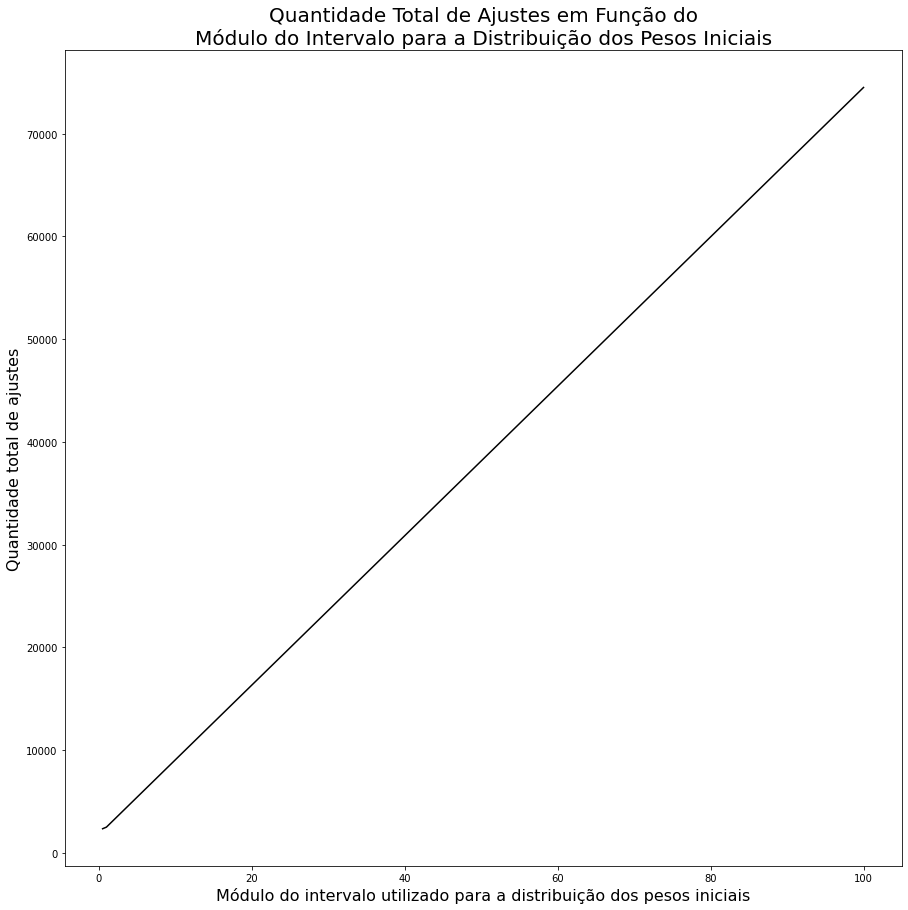

In [24]:
eixo_x = 'Módulo do intervalo utilizado para a distribuição dos pesos iniciais'
eixo_y = 'Quantidade total de ajustes'
titulo = 'Quantidade Total de Ajustes em Função do\nMódulo do Intervalo para a Distribuição dos Pesos Iniciais'

grafico_configuracao(1, 3, eixo_x, eixo_y, titulo)

### Quantidade Total de Épocas em Função da Taxa de Aprendizagem

**Neste gráfico observamos que quanto maior a taxa de aprendizado menor é a quantidade de ajustes.**

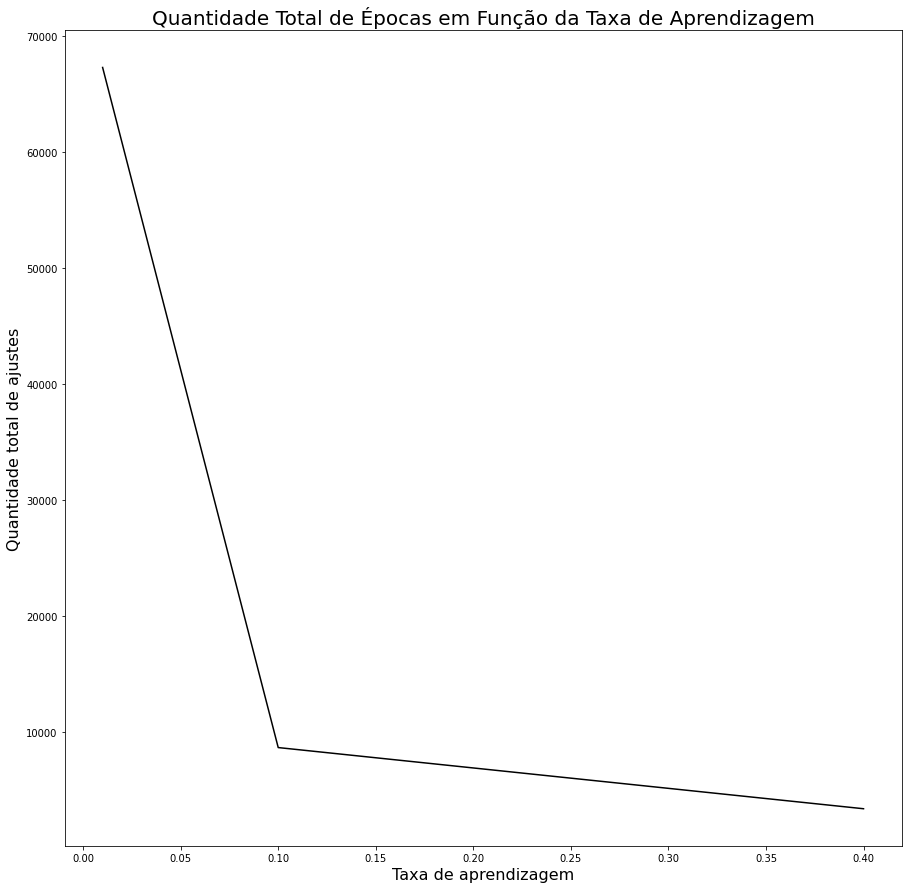

In [25]:
eixo_x = 'Taxa de aprendizagem'
eixo_y = 'Quantidade total de ajustes'
titulo = 'Quantidade Total de Épocas em Função da Taxa de Aprendizagem'

grafico_configuracao(2, 3, eixo_x, eixo_y, titulo)

### Quantidade Total de Épocas em Função do Módulo do Intervalo para a Distribuição dos Pesos Iniciais

**Neste gráfico observamos que quanto maior o intervalo dos valores iniciais de pesos maior é a quantidade de épocas.**

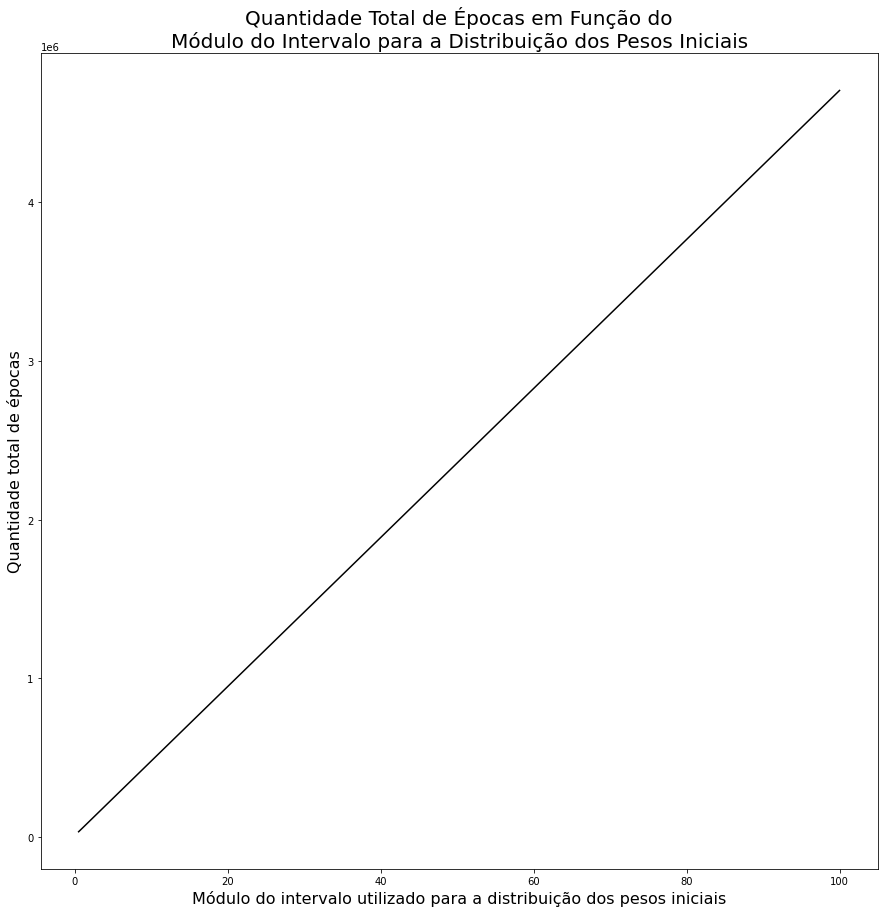

In [26]:
eixo_x = 'Módulo do intervalo utilizado para a distribuição dos pesos iniciais'
eixo_y = 'Quantidade total de épocas'
titulo = 'Quantidade Total de Épocas em Função do\nMódulo do Intervalo para a Distribuição dos Pesos Iniciais'

grafico_configuracao(1, 4, eixo_x, eixo_y, titulo)

### Quantidade Total de Épocas em Função do Módulo da Taxa de Aprendizagem

**Neste gráfico observamos que quanto maior a taxa de aprendizado menor é a quantidade de épocas.**

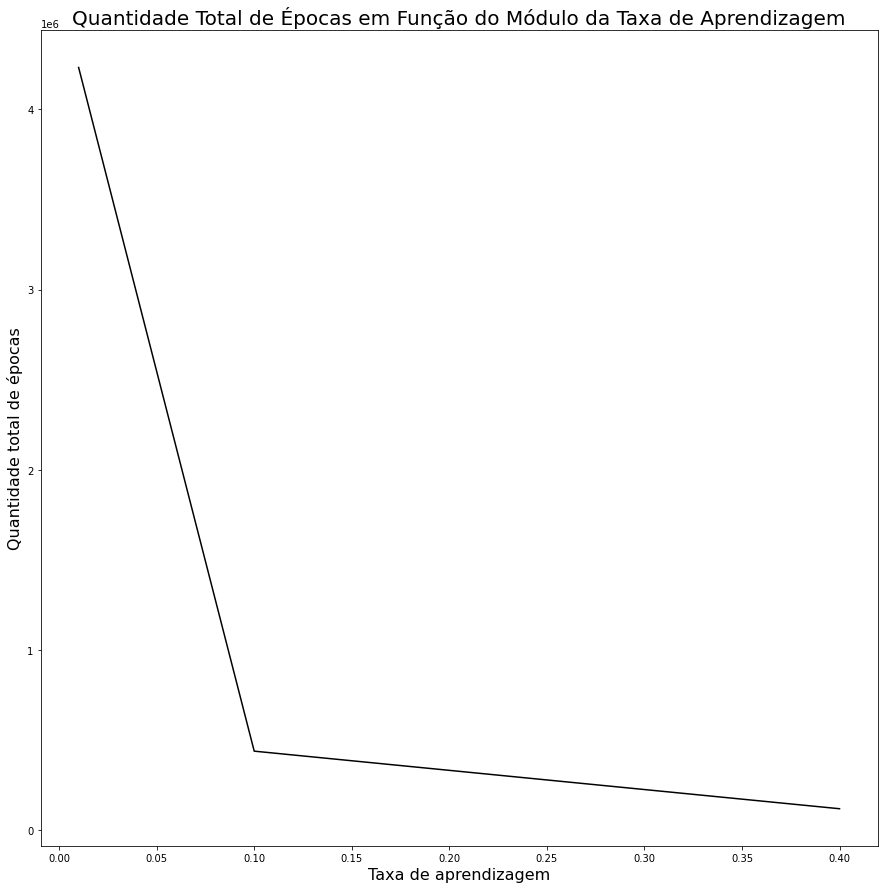

In [27]:
eixo_x = 'Taxa de aprendizagem'
eixo_y = 'Quantidade total de épocas'
titulo = 'Quantidade Total de Épocas em Função do Módulo da Taxa de Aprendizagem'

grafico_configuracao(2, 4, eixo_x, eixo_y, titulo)

### Verificando Quais Configurações Obtiveram Menor ou Maior Quantidade de Ajustes e Épocas

**Configuração que teve menor quantidade de ajustes**

In [28]:
val = np.where(res_configuracoes[:,3] == min(res_configuracoes[:,3]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.10 e I = (-1.0, 1.0)


**Configuração que teve maior quantidade de ajustes**

In [29]:
val = np.where(res_configuracoes[:,3] == max(res_configuracoes[:,3]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.01 e I = (-100.0, 100.0)


**Configuração que teve menor quantidade de épocas**

In [30]:
val = np.where(res_configuracoes[:,4] == min(res_configuracoes[:,4]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.40 e I = (-0.5, 0.5)


**Configuração que teve maior quantidade de épocas**

In [31]:
val = np.where(res_configuracoes[:,4] == max(res_configuracoes[:,4]))[0][0]
print('η = %.2f e I = %s' % (res_configuracoes[val][2], (res_configuracoes[val][0], res_configuracoes[val][1])))

η = 0.01 e I = (-100.0, 100.0)


### Tabela com Todos os Resultados Obtidos Ordenados de Forma Decrescente por Quantidade de Ajustes

In [55]:
df = []

for i in range(len(res_configuracoes)):
    df.append({'η': res_configuracoes[i][2],
               'I': (res_configuracoes[i][0], res_configuracoes[i][1]),
               'Quantidade de Épocas': res_configuracoes[i][3],
               'Quantidade de Ajustes': res_configuracoes[i][4]})
    
df = pd.DataFrame.from_dict(df)
df.sort_values(by='Quantidade de Ajustes')

,η,I,Quantidade de Épocas,Quantidade de Ajustes
2,0.40,"(-0.5, 0.5)",692.0,3285.0
1,0.40,"(-1.0, 1.0)",721.0,3648.0
5,0.10,"(-0.5, 0.5)",725.0,4656.0
4,0.10,"(-1.0, 1.0)",652.0,6258.0
8,0.01,"(-0.5, 0.5)",918.0,26592.0
7,0.01,"(-1.0, 1.0)",1120.0,47772.0
0,0.40,"(-100.0, 100.0)",1976.0,113790.0
3,0.10,"(-100.0, 100.0)",7284.0,429228.0
6,0.01,"(-100.0, 100.0)",65238.0,4158435.0


### Tabela com Todos os Resultados Obtidos Ordenados de Forma Decrescente por Quantidade de Épocas

In [56]:
df = []

for i in range(len(res_configuracoes)):
    df.append({'η': res_configuracoes[i][2],
               'I': (res_configuracoes[i][0], res_configuracoes[i][1]),
               'Quantidade de Épocas': res_configuracoes[i][3],
               'Quantidade de Ajustes': res_configuracoes[i][4]})
    
df = pd.DataFrame.from_dict(df)
df.sort_values(by='Quantidade de Épocas')

,η,I,Quantidade de Épocas,Quantidade de Ajustes
4,0.10,"(-1.0, 1.0)",652.0,6258.0
2,0.40,"(-0.5, 0.5)",692.0,3285.0
1,0.40,"(-1.0, 1.0)",721.0,3648.0
5,0.10,"(-0.5, 0.5)",725.0,4656.0
8,0.01,"(-0.5, 0.5)",918.0,26592.0
7,0.01,"(-1.0, 1.0)",1120.0,47772.0
0,0.40,"(-100.0, 100.0)",1976.0,113790.0
3,0.10,"(-100.0, 100.0)",7284.0,429228.0
6,0.01,"(-100.0, 100.0)",65238.0,4158435.0


**Desta forma, é evidente o impacto de diferentes parâmetros no tempo de convergência durante o aprendizado do neurônio, em especial o intervalo utilizado para a geração uniforme dos pesos iniciais do neurônio. Durante a análise, foi possível perceber-se que quanto maior o intervalo utilizado para a geração dos pesos, maior a quantidade de ajustes necessários para a convergência da solução, independetemente dos outros parâmetros considerados. Assim, é possível afirmar-se que no contexto abordado, é mais adequado o emprego de intervalos de distribuição menores, a fim de diminuir o tempo de treinamento do neurônio, tal como a necessidade de poder computacional necessária para fazer os devidos ajustes para convergência.** 

## Parte III – Validação _Holdout_ em Problema Não-Linearmente Separável

### Leitura do arquivo `dataHoldout.txt`

In [32]:
data = np.fromfile(os.path.join('datasets', 'dataHoldout.txt'), dtype=float)
print(data.shape)

(2400,)


### Redimensionamento do Array

In [33]:
registros = data.reshape(data.size // 3, 3)
print(registros.shape)

(800, 3)


### Preparação dos Arrays de Entradas e Saídas

In [34]:
X = separar_entradas(registros)
print(X.shape)

Y = separar_saidas(registros)
print(Y.shape)

(800, 3)
(800,)


### Gráfico da Distribuição dos Dados

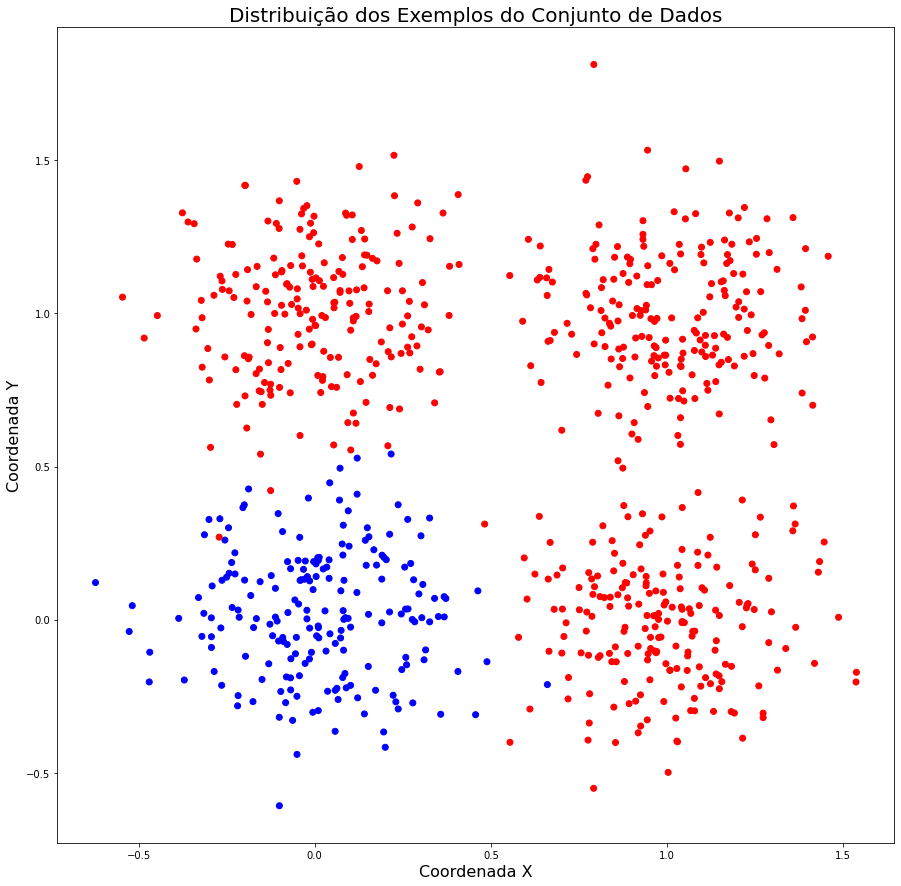

In [35]:
cores = criar_cores(Y)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Distribuição dos Exemplos do Conjunto de Dados', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.scatter(X[:,1], X[:,2], marker='o', color=cores)
plt.show()

**Desta forma, é possível observar que apenas uma reta não é capaz de separar todos os exemplos do conjunto de dados, sem que exemplos com diferentes rótulos se misturem, sendo abordado melhor a seguir.**

### Randomização dos Dados

In [36]:
X, Y = aleatoriza(X, Y)

**Antes da aplicação do _Holdout_, os dados são aleatorizados de modo minimizar um possível superajuste durante a etapa de treinamento. Vale ressaltar-se que durante o treinamento, a partição destinada a treino, será aleatorizada novamente a cada época, conforme será observado a frente.** 

### Aplicação do _Holdout_

In [37]:
lim = int(len(X) * 0.7)

X_treino, Y_treino, X_teste, Y_teste = X[:lim], Y[:lim], X[lim:], Y[lim:]
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(560, 3) (240, 3) (560,) (240,)


### Parâmetros do Neurônio

In [38]:
teta, taxa_aprendizagem, pesos_iniciais = 0, 0.1, np.random.uniform(-0.5, 0.5, X_treino.shape[1])

### Instanciação do Perceptron

In [39]:
perceptron3 = Perceptron(teta=0, taxa_aprendizagem=0.1, pesos=pesos_iniciais)
print(perceptron3.pesos)

[-0.0389 -0.4053  0.3816]


### Treinamento do Neurônio

In [40]:
epocas, ajustes_por_epoca = perceptron3.treinamento(X_treino, Y_treino, max_epocas=100, aleatorio=True)

Pesos Iniciais: [-0.0389 -0.4053  0.3816]

Novos Pesos: [-0.1389 -0.3964  0.3593]
Novos Pesos: [-0.0389 -0.5276  0.2449]
Novos Pesos: [ 0.0611 -0.5431  0.1419]
Novos Pesos: [ 0.1611 -0.5557 -0.0061]
Novos Pesos: [ 0.0611 -0.5403  0.021 ]
Novos Pesos: [-0.0389 -0.5395  0.0412]
Novos Pesos: [ 0.0611 -0.5252 -0.0363]
Novos Pesos: [-0.0389 -0.4997 -0.0191]
Novos Pesos: [ 0.0611 -0.4883 -0.1191]
Novos Pesos: [-0.0389 -0.4427 -0.1501]
Novos Pesos: [-0.1389 -0.415  -0.15  ]
Novos Pesos: [-0.0389 -0.379  -0.2799]
Novos Pesos: [-0.1389 -0.3644 -0.2621]
Novos Pesos: [-0.0389 -0.349  -0.3162]
Novos Pesos: [-0.1389 -0.3493 -0.2972]
Novos Pesos: [-0.2389 -0.3423 -0.2582]
Novos Pesos: [-0.1389 -0.3289 -0.3619]
Novos Pesos: [-0.2389 -0.314  -0.3319]
Novos Pesos: [-0.1389 -0.294  -0.4181]
Novos Pesos: [-0.2389 -0.282  -0.3654]
Novos Pesos: [-0.1389 -0.381  -0.3386]
Novos Pesos: [-0.0389 -0.4602 -0.2836]
Novos Pesos: [-0.1389 -0.4589 -0.2632]
Novos Pesos: [-0.2389 -0.4183 -0.2801]
Novos Pesos: [-0.1389

Novos Pesos: [-0.2389 -0.6654 -0.6028]
Novos Pesos: [-0.3389 -0.6441 -0.5749]
Novos Pesos: [-0.2389 -0.5957 -0.6668]
Novos Pesos: [-0.3389 -0.5631 -0.6336]

96 ajustes no vetor de pesos na época 12

Novos Pesos: [-0.2389 -0.666  -0.5938]
Novos Pesos: [-0.1389 -0.6506 -0.6478]
Novos Pesos: [-0.2389 -0.6192 -0.6577]
Novos Pesos: [-0.3389 -0.6121 -0.6186]
Novos Pesos: [-0.4389 -0.6001 -0.5659]
Novos Pesos: [-0.3389 -0.6778 -0.5543]
Novos Pesos: [-0.2389 -0.6653 -0.6276]
Novos Pesos: [-0.1389 -0.7445 -0.5725]
Novos Pesos: [-0.2389 -0.7038 -0.5894]
Novos Pesos: [-0.3389 -0.6666 -0.5825]
Novos Pesos: [-0.4389 -0.6449 -0.5284]
Novos Pesos: [-0.3389 -0.6317 -0.6232]
Novos Pesos: [-0.2389 -0.7093 -0.5838]
Novos Pesos: [-0.3389 -0.6786 -0.5723]
Novos Pesos: [-0.2389 -0.6593 -0.6349]
Novos Pesos: [-0.3389 -0.5933 -0.6561]
Novos Pesos: [-0.4389 -0.5669 -0.6234]
Novos Pesos: [-0.3389 -0.5448 -0.6937]
Novos Pesos: [-0.4389 -0.5211 -0.6561]
Novos Pesos: [-0.3389 -0.4987 -0.7378]
Novos Pesos: [-0.2389

Novos Pesos: [-0.1389 -0.6411 -0.6039]
Novos Pesos: [-0.2389 -0.629  -0.5629]
Novos Pesos: [-0.3389 -0.5989 -0.5355]
Novos Pesos: [-0.2389 -0.5791 -0.6086]
Novos Pesos: [-0.3389 -0.5578 -0.5807]
Novos Pesos: [-0.2389 -0.5094 -0.6727]
Novos Pesos: [-0.3389 -0.4768 -0.6395]
Novos Pesos: [-0.2389 -0.5481 -0.6385]

96 ajustes no vetor de pesos na época 25

Novos Pesos: [-0.3389 -0.5328 -0.6114]
Novos Pesos: [-0.2389 -0.6357 -0.5715]
Novos Pesos: [-0.1389 -0.6204 -0.6256]
Novos Pesos: [-0.2389 -0.5836 -0.6247]
Novos Pesos: [-0.3389 -0.5766 -0.5856]
Novos Pesos: [-0.2389 -0.6431 -0.5753]
Novos Pesos: [-0.3389 -0.631  -0.5226]
Novos Pesos: [-0.2389 -0.6185 -0.5958]
Novos Pesos: [-0.1389 -0.6977 -0.5408]
Novos Pesos: [-0.2389 -0.657  -0.5577]
Novos Pesos: [-0.3389 -0.6198 -0.5508]
Novos Pesos: [-0.2389 -0.6777 -0.545 ]
Novos Pesos: [-0.3389 -0.656  -0.4909]
Novos Pesos: [-0.2389 -0.646  -0.5668]
Novos Pesos: [-0.3389 -0.6153 -0.5552]
Novos Pesos: [-0.2389 -0.596  -0.6178]
Novos Pesos: [-0.3389

Novos Pesos: [-0.4389 -0.65   -0.5393]
Novos Pesos: [-0.3389 -0.6302 -0.6124]
Novos Pesos: [-0.2389 -0.5856 -0.7117]
Novos Pesos: [-0.1389 -0.6635 -0.6779]
Novos Pesos: [-0.2389 -0.6422 -0.65  ]
Novos Pesos: [-0.3389 -0.6096 -0.6168]

96 ajustes no vetor de pesos na época 36

Novos Pesos: [-0.2389 -0.5942 -0.6709]
Novos Pesos: [-0.3389 -0.5872 -0.6319]
Novos Pesos: [-0.2389 -0.6537 -0.6215]
Novos Pesos: [-0.3389 -0.6416 -0.5688]
Novos Pesos: [-0.2389 -0.6291 -0.6421]
Novos Pesos: [-0.1389 -0.7083 -0.587 ]
Novos Pesos: [-0.2389 -0.6677 -0.6039]
Novos Pesos: [-0.3389 -0.6304 -0.597 ]
Novos Pesos: [-0.2389 -0.6883 -0.5912]
Novos Pesos: [-0.3389 -0.6666 -0.5371]
Novos Pesos: [-0.2389 -0.6329 -0.6321]
Novos Pesos: [-0.3389 -0.6022 -0.6205]
Novos Pesos: [-0.2389 -0.5829 -0.6831]
Novos Pesos: [-0.3389 -0.5169 -0.7043]
Novos Pesos: [-0.4389 -0.4905 -0.6716]
Novos Pesos: [-0.3389 -0.4684 -0.7419]
Novos Pesos: [-0.4389 -0.4447 -0.7043]
Novos Pesos: [-0.3389 -0.5167 -0.6855]
Novos Pesos: [-0.2389

Novos Pesos: [-0.3389 -0.6249 -0.5806]
Novos Pesos: [-0.2389 -0.6056 -0.6432]
Novos Pesos: [-0.3389 -0.5395 -0.6644]
Novos Pesos: [-0.4389 -0.5131 -0.6316]
Novos Pesos: [-0.3389 -0.491  -0.7019]
Novos Pesos: [-0.4389 -0.4673 -0.6644]
Novos Pesos: [-0.3389 -0.4449 -0.746 ]
Novos Pesos: [-0.2389 -0.517  -0.7272]
Novos Pesos: [-0.3389 -0.4973 -0.7068]
Novos Pesos: [-0.2389 -0.5692 -0.6809]
Novos Pesos: [-0.1389 -0.6546 -0.6408]
Novos Pesos: [-0.2389 -0.6426 -0.5998]
Novos Pesos: [-0.3389 -0.6223 -0.5802]
Novos Pesos: [-0.4389 -0.5921 -0.5528]
Novos Pesos: [-0.3389 -0.6764 -0.5391]
Novos Pesos: [-0.2389 -0.6566 -0.6122]
Novos Pesos: [-0.3389 -0.6354 -0.5843]
Novos Pesos: [-0.2389 -0.587  -0.6763]
Novos Pesos: [-0.3389 -0.5543 -0.6431]

96 ajustes no vetor de pesos na época 50

Novos Pesos: [-0.2389 -0.6573 -0.6032]
Novos Pesos: [-0.1389 -0.6419 -0.6573]
Novos Pesos: [-0.2389 -0.6052 -0.6564]
Novos Pesos: [-0.3389 -0.5981 -0.6173]
Novos Pesos: [-0.2389 -0.6646 -0.607 ]
Novos Pesos: [-0.3389

Novos Pesos: [-0.2389 -0.6923 -0.5977]
Novos Pesos: [-0.3389 -0.671  -0.5698]
Novos Pesos: [-0.2389 -0.6226 -0.6618]
Novos Pesos: [-0.3389 -0.59   -0.6286]

90 ajustes no vetor de pesos na época 61

Novos Pesos: [-0.2389 -0.5746 -0.6826]
Novos Pesos: [-0.3389 -0.5675 -0.6436]
Novos Pesos: [-0.2389 -0.634  -0.6333]
Novos Pesos: [-0.3389 -0.622  -0.5805]
Novos Pesos: [-0.2389 -0.5674 -0.6858]
Novos Pesos: [-0.1389 -0.6466 -0.6308]
Novos Pesos: [-0.0389 -0.702  -0.5907]
Novos Pesos: [-0.1389 -0.7059 -0.5777]
Novos Pesos: [-0.2389 -0.6652 -0.5946]
Novos Pesos: [-0.3389 -0.628  -0.5877]
Novos Pesos: [-0.2389 -0.6859 -0.5819]
Novos Pesos: [-0.3389 -0.6642 -0.5278]
Novos Pesos: [-0.2389 -0.6542 -0.6037]
Novos Pesos: [-0.3389 -0.6235 -0.5922]
Novos Pesos: [-0.2389 -0.6042 -0.6547]
Novos Pesos: [-0.3389 -0.5382 -0.6759]
Novos Pesos: [-0.4389 -0.5118 -0.6432]
Novos Pesos: [-0.3389 -0.4897 -0.7135]
Novos Pesos: [-0.4389 -0.466  -0.6759]
Novos Pesos: [-0.3389 -0.538  -0.6571]
Novos Pesos: [-0.2389

Novos Pesos: [-0.1389 -0.7411 -0.5758]
Novos Pesos: [-0.2389 -0.7004 -0.5927]
Novos Pesos: [-0.3389 -0.6632 -0.5858]
Novos Pesos: [-0.4389 -0.6415 -0.5317]
Novos Pesos: [-0.3389 -0.6283 -0.6265]
Novos Pesos: [-0.2389 -0.7059 -0.5872]
Novos Pesos: [-0.3389 -0.6752 -0.5756]
Novos Pesos: [-0.2389 -0.6559 -0.6382]
Novos Pesos: [-0.3389 -0.5899 -0.6594]
Novos Pesos: [-0.4389 -0.5635 -0.6267]
Novos Pesos: [-0.3389 -0.5414 -0.697 ]
Novos Pesos: [-0.4389 -0.5177 -0.6594]
Novos Pesos: [-0.3389 -0.4953 -0.7411]
Novos Pesos: [-0.2389 -0.5673 -0.7222]
Novos Pesos: [-0.3389 -0.5477 -0.7018]
Novos Pesos: [-0.2389 -0.6196 -0.676 ]
Novos Pesos: [-0.1389 -0.6807 -0.6468]
Novos Pesos: [-0.2389 -0.6687 -0.6058]
Novos Pesos: [-0.3389 -0.6606 -0.575 ]
Novos Pesos: [-0.4389 -0.6304 -0.5476]
Novos Pesos: [-0.3389 -0.6106 -0.6206]
Novos Pesos: [-0.2389 -0.6887 -0.5964]
Novos Pesos: [-0.3389 -0.6674 -0.5685]
Novos Pesos: [-0.2389 -0.619  -0.6605]
Novos Pesos: [-0.3389 -0.5864 -0.6273]

90 ajustes no vetor de p

Novos Pesos: [-0.1389 -0.7443 -0.563 ]
Novos Pesos: [-0.2389 -0.7037 -0.5799]
Novos Pesos: [-0.3389 -0.6665 -0.573 ]
Novos Pesos: [-0.4389 -0.6448 -0.5189]
Novos Pesos: [-0.3389 -0.6316 -0.6136]
Novos Pesos: [-0.2389 -0.7092 -0.5743]
Novos Pesos: [-0.3389 -0.6785 -0.5628]
Novos Pesos: [-0.2389 -0.6592 -0.6254]
Novos Pesos: [-0.3389 -0.5932 -0.6466]
Novos Pesos: [-0.4389 -0.5668 -0.6138]
Novos Pesos: [-0.3389 -0.5447 -0.6841]
Novos Pesos: [-0.4389 -0.521  -0.6466]
Novos Pesos: [-0.3389 -0.4986 -0.7282]
Novos Pesos: [-0.2389 -0.5706 -0.7094]
Novos Pesos: [-0.3389 -0.551  -0.689 ]
Novos Pesos: [-0.2389 -0.6229 -0.6631]
Novos Pesos: [-0.1389 -0.684  -0.634 ]
Novos Pesos: [-0.2389 -0.6719 -0.593 ]
Novos Pesos: [-0.3389 -0.6368 -0.5919]
Novos Pesos: [-0.4389 -0.6067 -0.5646]
Novos Pesos: [-0.3389 -0.691  -0.5508]
Novos Pesos: [-0.2389 -0.6712 -0.6239]
Novos Pesos: [-0.3389 -0.65   -0.596 ]
Novos Pesos: [-0.2389 -0.6015 -0.688 ]
Novos Pesos: [-0.3389 -0.5689 -0.6548]

96 ajustes no vetor de p

In [41]:
print('Total de Épocas:', epocas)
print('Pesos finais:', perceptron3.pesos)
print('Total de ajustes de pesos:', sum(ajustes_por_epoca))

Total de Épocas: 100
Pesos finais: [-0.3389 -0.5636 -0.6358]
Total de ajustes de pesos: 9177


### Cálculo das Saídas para Dados de Treino e Teste

In [42]:
Y_previsto_treino, Y_previsto_teste = perceptron3.predicao(X_treino), perceptron3.predicao(X_teste)

## 1. Apresente a matriz de confusão das previsões efetuadas para o conjunto de testes;

### Matriz de Confusão para Dados de Teste

In [43]:
matriz_teste, valores_matriz_teste = perceptron3.matriz_confusao(Y_previsto_teste, Y_teste)
print(matriz_teste)

[[56, 1], [7, 176]]


## 2. Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?

### Acurácia para Dados de Treino

In [44]:
matriz_treino, valores_matriz_treino = perceptron3.matriz_confusao(Y_previsto_treino, Y_treino)
vp, vn, fp, fn = valores_matriz_treino

print('Acurácia: %.4f' % acuracia(vp, vn, fp, fn))

Acurácia: 0.9518


## 3. Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score;

### Revocação, Precisão e F1 _Score_ para Treino

In [45]:
print('Precisão: %.4f' % precisao(vp, vn, fp, fn))
print('Revocação: %.4f' % revocacao(vp, vn, fp, fn))
print('F1 Score: %.4f' % f1(vp, vn, fp, fn))

Precisão: 0.9580
Revocação: 0.8671
F1 Score: 0.9103


## 4. A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

### Acurácia, Revocação, Precisão e F1 _Score_ para Teste

In [46]:
vp, vn, fp, fn = valores_matriz_teste

print('Acurácia: %.4f' % acuracia(vp, vn, fp, fn))
print('Precisão: %.4f' % precisao(vp, vn, fp, fn))
print('Revocação: %.4f' % revocacao(vp, vn, fp, fn))
print('F1 Score: %.4f' % f1(vp, vn, fp, fn))

Acurácia: 0.9667
Precisão: 0.9825
Revocação: 0.8889
F1 Score: 0.9333


### Gráficos de Desempenho para Treino e Teste

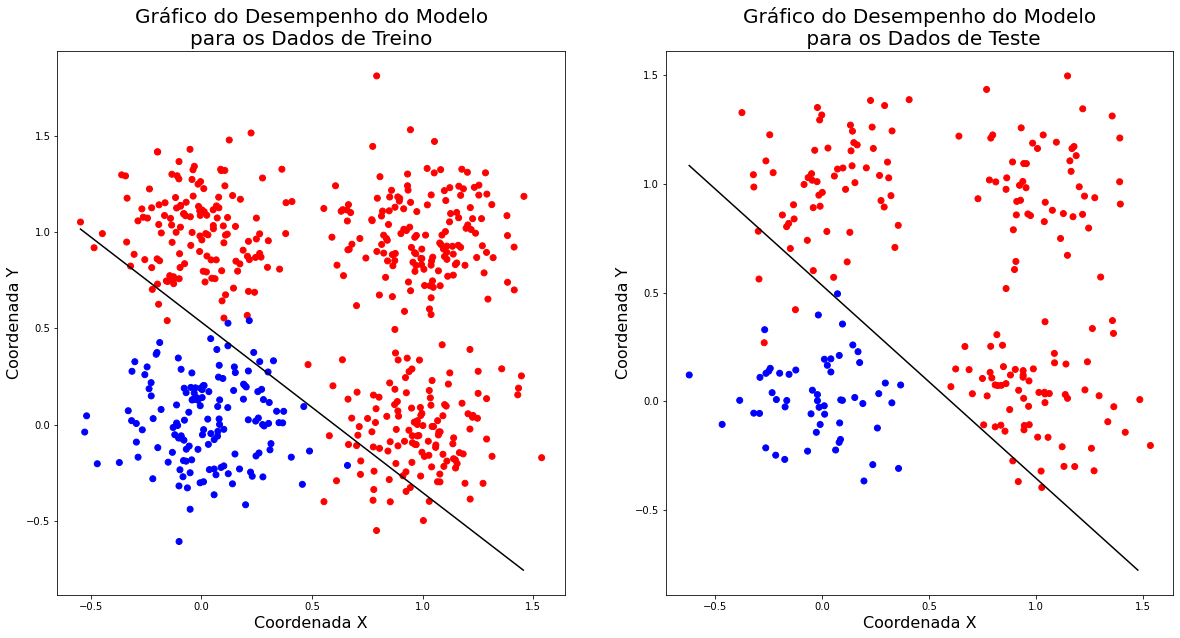

In [47]:
plt.rcParams['figure.figsize'] = (20, 10)

# Cálculo dos coeficientes da linha de decisão
a, b = perceptron3.pesos[0] / perceptron3.pesos[2], (-1) * (perceptron3.pesos[1] / perceptron3.pesos[2])
menor, maior = min(X_treino[:,1]), max(X_treino[:,1])

# Criando os pontos da linha de decisão para treino
x = np.arange(menor, maior, 0.1)
y = a + b * x

# Criação de cores de acordo com a saída
cores_treino = criar_cores(Y_treino)

# Criação do gráfico para treino    
plt.subplot(1, 2, 1)
plt.title('Gráfico do Desempenho do Modelo\npara os Dados de Treino', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.plot(x, y, color='black', markersize=100)
plt.scatter(X_treino[:,1], X_treino[:,2], marker='o', color=cores_treino)

# Cálculo dos coeficientes da linha de decisão
a, b = perceptron3.pesos[0] / perceptron3.pesos[2], (-1) * (perceptron3.pesos[1] / perceptron3.pesos[2])
menor, maior = min(X_teste[:,1]), max(X_teste[:,1])

# Criando os pontos da linha de decisão para teste
x = np.arange(menor, maior, 0.1)
y = a + b * x

# Criação de cores de acordo com a saída
cores_teste = criar_cores(Y_teste)

# Criação do gráfico para teste
plt.subplot(1, 2, 2)
plt.title('Gráfico do Desempenho do Modelo\n para os Dados de Teste', size=20)

plt.xlabel('Coordenada X', size=16)
plt.ylabel('Coordenada Y', size=16)

plt.plot(x, y, color='black', markersize=100)
plt.scatter(X_teste[:,1], X_teste[:,2], marker='o', color=cores_teste)

plt.show()

**Assim, como mencionado anteriormente, é evidente a característica não linear do problema abordado, evidenciado pela não convergência do neurôrio durante seu treinamento, tal como a incapacidade de separação dos dados por apenas uma reta, obtida com o neurônio perceptron. Desta forma, evidencia-se também a necessiade de uma função mais complexa, de forma a implementar uma superfície de separação adequada ao problema apresentado.**  